In [1]:
import math
import json
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [2]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    https://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352
    """
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

def calcSlope(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return "NaL"
    elif x1 == x2:
        return "vertical"
    elif y1 == y2:
        return "horizontal"
    else:
        return round((y2-y1)/(x2-x1),4)

def calcDistance(x1,y1,x2,y2): 
    """
    determine the distance between 2 points on a coordinate plane
    """
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),4)

def calcCost(distance):
    """
    determine the cost of the movement according to the rules:
    Each swing costs the particle $D^-2, where D is the straight-line distance of the length of rope used for that particular swing.
    """
    return round(pow(distance, -2),4)

def plotPathToss(x1,y1,x2,y2):
    # plot points
    ax.plot(x1, y1, 'bo')
    ax.plot(x2, y2, 'bo')
    # plot line
    ax.plot([x1, x2],[y1, y2],'b-')
    d = calcDistance(x1, y1, x2, y2)
    # print("Distance: {0:.4f}".format(d))
    # print("Cost: {0:.4f}".format(calcCost(d)))
    # print("Sum of Squares: {0:.4f}".format(sumOfSquares(d)))
    # circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def plotPathSwing(x1,y1,x2,y2,remaining):
    # plot points
    ax.plot(x1, y1, 'ro')
    ax.plot(x2, y2, 'ro')
    # plot line
    ax.plot([x1, x2],[y1, y2],'r-')
#     d = calcDistance(x1, y1, x2, y2)
#     d = remaining-d
#     print(d)
    if remaining > 0:
        circles(x2, y2, remaining, alpha=0.2, lw=5, edgecolor='b')
#     return remaining

def sumOfSquares(n):
    return sum([i**2 for i in range(1, math.floor(n) + 1)])

def calcAngle(p0, p1=np.array([0,0]), p2=None):
    ''' compute angle (in degrees) for p0p1p2 corner
    Inputs:
        p0,p1,p2 - points in the form of [x,y]
    '''
    if p2 is None:
        p2 = p1 + np.array([1, 0])
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)

    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return np.degrees(angle)

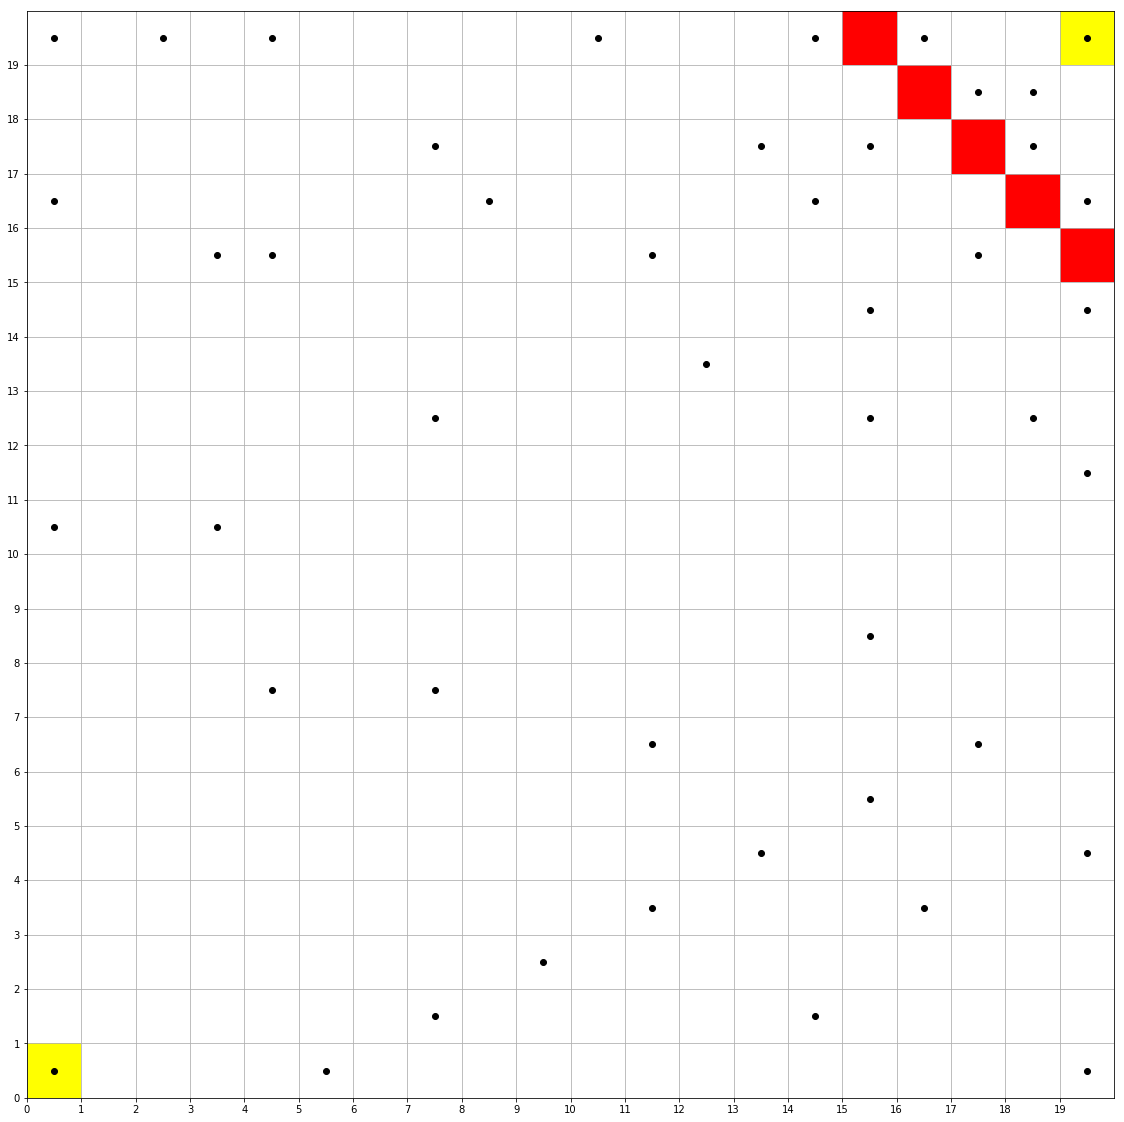

In [3]:
figure(figsize=(20,20))
ax=subplot(aspect='equal')
coords = [(0.5, 19.5), (2.5, 19.5), (4.5, 19.5), (10.5, 19.5), (14.5, 19.5), (16.5, 19.5), (19.5, 19.5), (17.5, 18.5), (18.5, 18.5), (7.5, 17.5), (13.5, 17.5), (15.5, 17.5), (18.5, 17.5), (0.5, 16.5), (8.5, 16.5), (14.5, 16.5), (19.5, 16.5), (3.5, 15.5), (4.5, 15.5), (11.5, 15.5), (17.5, 15.5), (15.5, 14.5), (19.5, 14.5), (12.5, 13.5), (7.5, 12.5), (15.5, 12.5), (18.5, 12.5), (19.5, 11.5), (0.5, 10.5), (3.5, 10.5), (15.5, 8.5), (4.5, 7.5), (7.5, 7.5), (11.5, 6.5), (17.5, 6.5), (15.5, 5.5), (13.5, 4.5), (19.5, 4.5), (11.5, 3.5), (16.5, 3.5), (9.5, 2.5), (7.5, 1.5), (14.5, 1.5), (0.5, 0.5), (5.5, 0.5), (19.5, 0.5)]
graph = {} 

ax.set_xticks(np.arange(0, 20, 1))
ax.set_yticks(np.arange(0, 20, 1))

# plot all coordinates
[ax.plot(i[0], i[1], 'ko') for i in coords]

# ax.plot(4.6098,0.3902, 'go')

# plot start and finish
ax.fill_between([0,1], 0, 1, facecolor='yellow')
ax.fill_between([19,20], 19, 20, facecolor='yellow')

ax.fill_between([15,16], 19, 20, facecolor='red')
ax.fill_between([16,17], 18, 19, facecolor='red')
ax.fill_between([17,18], 17, 18, facecolor='red')
ax.fill_between([18,19], 16, 17, facecolor='red')
ax.fill_between([19,20], 15, 16, facecolor='red')
# print(calcDistance(.5,.5,1.5,2.5))
plt.grid()
xlim(0,20)
ylim(0,20)

for i in range(len(coords)):
    x1 = coords[i][0]
    y1 = coords[i][1]
    # first toss START
#     x1 = .5
#     y1 = .5

    viable_toss_stack = {}
    toss = []
    toss_length = 0

    for j in coords:
        x2 = j[0]
        y2 = j[1]
        distance = calcDistance(x1,y1,x2,y2)
        slope = calcSlope(x1,y1,x2,y2)
        if slope not in viable_toss_stack:
            viable_toss_stack[slope] = (x2,y2,distance,slope)
        else:
            if abs(viable_toss_stack[slope][2]) > abs(distance):
                del viable_toss_stack[slope]
                viable_toss_stack[slope] = (x2,y2,distance,slope)
                
    # build the graph
    for k in viable_toss_stack:
        toss.append((viable_toss_stack[k][0], viable_toss_stack[k][1], viable_toss_stack[k][2], viable_toss_stack[k][3]))
        # toss.append((viable_toss_stack[k][0], viable_toss_stack[k][1]))
        graph[(x1,y1)] = toss

In [4]:
print(graph)

{(0.5, 19.5): [(0.5, 19.5, 0.0, 'NaL'), (2.5, 19.5, 2.0, 'horizontal'), (17.5, 18.5, 17.0294, -0.0588), (18.5, 18.5, 18.0278, -0.0556), (7.5, 17.5, 7.2801, -0.2857), (13.5, 17.5, 13.1529, -0.1538), (15.5, 17.5, 15.1327, -0.1333), (18.5, 17.5, 18.1108, -0.1111), (0.5, 16.5, 3.0, 'vertical'), (8.5, 16.5, 8.544, -0.375), (14.5, 16.5, 14.3178, -0.2143), (19.5, 16.5, 19.2354, -0.1579), (3.5, 15.5, 5.0, -1.3333), (4.5, 15.5, 5.6569, -1.0), (11.5, 15.5, 11.7047, -0.3636), (17.5, 15.5, 17.4642, -0.2353), (15.5, 14.5, 15.8114, -0.3333), (19.5, 14.5, 19.6469, -0.2632), (12.5, 13.5, 13.4164, -0.5), (15.5, 12.5, 16.5529, -0.4667), (18.5, 12.5, 19.3132, -0.3889), (19.5, 11.5, 20.6155, -0.4211), (3.5, 10.5, 9.4868, -3.0), (15.5, 8.5, 18.6011, -0.7333), (7.5, 7.5, 13.8924, -1.7143), (11.5, 6.5, 17.0294, -1.1818), (17.5, 6.5, 21.4009, -0.7647), (15.5, 5.5, 20.5183, -0.9333), (13.5, 4.5, 19.8494, -1.1538), (19.5, 4.5, 24.2074, -0.7895), (11.5, 3.5, 19.4165, -1.4545), (9.5, 2.5, 19.2354, -1.8889), (7.5,